# Random Point Creation

In this project, we will create a series of random points all of which are contained within a specific bounding vector geometry. We will use as that geometry a polygon representing Mount Desert Island in the state of Maine. We will access the geometry of the boundary geometry, then create 500 random points that fall within the polygon. Finally, we will save the random points to a new file.

First, let's import the modules we need for this project.

In [48]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt

Next, let's read in the boundary datafile and plot it so we can visualize the shape we're working with.

<Axes: >

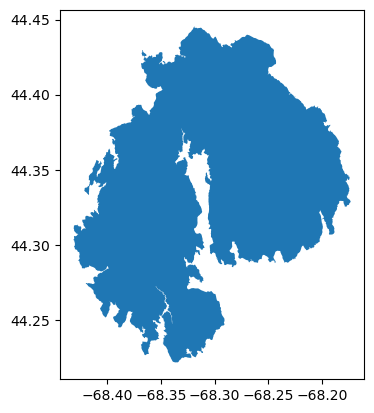

In [49]:
mdi = gpd.read_file('./data/mdi.shp')
mdi.plot()

Next, let's store the coordinate referene system of the boundary dataset.

In [50]:
crs = mdi.crs
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The boundary dataset just has one feature, and we're going to access it then extract the polygon geometry and the bounding rectangle of the polygon.

In [51]:
mdi_row = mdi.loc[0]
mdi_polygon = mdi_row['geometry']
mdi_bounds = mdi_polygon.bounds
mdi_bounds

(-68.4314467233597, 44.2216783533493, -68.1735067384296, 44.4453583245025)

Next, we're going to calculate how wide and how tall the bounding rectangle is.

In [52]:
start_lon = mdi_bounds[0]
end_lon = mdi_bounds[2]
delta_lon = end_lon - start_lon
start_lat = mdi_bounds[1]
end_lat = mdi_bounds[3]
delta_lat = end_lat - start_lat
print(delta_lon, delta_lat)

0.25793998493010406 0.22367997115320293


The next step is to create the list of random points. We start with an empty list. While the length of that list is less than our target number (500), we craeate random coordinates within the bounding rectangle of boundary dataset. We then check to see if the bounding geometry contains that point. If it does, then we add it to the list. If not, then we try again with new random coordinates.

In [59]:
points = []
while len(points) < 500:
  lon = start_lon + np.random.uniform() * delta_lon
  lat = start_lat + np.random.uniform() * delta_lat
  pt = Point(lon, lat)
  if mdi_polygon.contains(pt):
    points.append(pt)

Now we're going to creat a geodataframe using the random points list.

In [60]:
gdf = gpd.GeoDataFrame(columns=['geometry'], geometry='geometry', crs=crs)
gdf['geometry'] = points
gdf


,geometry
0,POINT (-68.41682 44.33879)
1,POINT (-68.28515 44.42385)
2,POINT (-68.34239 44.33949)
3,POINT (-68.32238 44.23829)
4,POINT (-68.29964 44.43041)
...,...
495,POINT (-68.27243 44.33440)
496,POINT (-68.34702 44.36547)
497,POINT (-68.35749 44.32377)
498,POINT (-68.38084 44.30892)


Next, let's plot the vector boundary and the random points together to make sure all the points are located within the boundary.

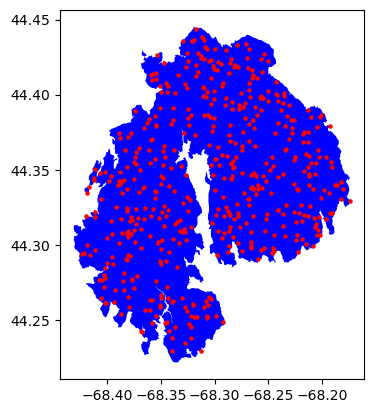

In [62]:
f, ax = plt.subplots()
mdi.plot(ax=ax, color='blue')
gdf.plot(ax=ax, color='red', markersize=5)
plt.show()

This looks good! All points within the bounding geometry.

Finally, we're going to save the random points to a new file and we're done!

In [63]:
gdf.to_file('./data/random_points.shp')